In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose
import nibabel as nib
import numpy as np
from tqdm import tqdm
from torchvision.transforms import Compose

In [2]:
# Custom dataset class for handling NIfTI files
class BrainDataset(Dataset):
    def __init__(self, t1w_files, t2w_files, fa_files, adc_files, transform=None):
        self.t1w_files = t1w_files
        self.t2w_files = t2w_files
        self.fa_files = fa_files
        # self.adc_files = adc_files
        self.transform = transform

    def __len__(self):
        return len(self.t1w_files)

    def __getitem__(self, idx):
        t1w_image = nib.load(self.t1w_files[idx]).get_fdata()
        t1w_image = t1w_image[3:179,5:213,3:179]
        t2w_image = nib.load(self.t2w_files[idx]).get_fdata()
        t2w_image = t2w_image[3:179,5:213,3:179]
        fa_image = nib.load(self.fa_files[idx]).get_fdata()
        fa_image = fa_image[3:179,5:213,3:179]
        # adc_image = nib.load(self.adc_files[idx]).get_fdata()

        # input_image = np.stack([t1w_image, t2w_image], axis=0)
        t1w_image = np.stack([t1w_image], axis=0)
        # target_image = np.stack([fa_image, adc_image], axis=0)
        t2w_image = np.stack([t2w_image], axis=0)
        fa_image = np.stack([fa_image], axis=0)

        # if self.transform:
            # input_image = self.transform(input_image)
            # target_image = self.transform(target_image)

        # return input_image, target_image
        return t1w_image, t2w_image, fa_image

In [3]:
import os
from torch.utils.data import DataLoader

os.chdir('../data/output14')

t1w_files = []
t2w_files = []
fa_files = []
adc_files = []

# Loop for patient folders from 000 to 069
for patient_id in range(1,70):
    patient_folder = str(patient_id).zfill(3)
    registered_path = os.path.join(patient_folder, "registered")
    registered2_path = os.path.join(patient_folder, "registered2")
    normalized_path = os.path.join(patient_folder, "normalized")

    try:
        t1w_files.append(os.path.join(normalized_path, "T1w_1mm_normalized.nii.gz"))
        t2w_files.append(os.path.join(registered_path, "T2w_registered.nii.gz"))
        adc_files.append(os.path.join(registered2_path, "ADC_registered.nii.gz"))
        fa_files.append(os.path.join(registered2_path, "FA_registered.nii.gz"))
    except FileNotFoundError:
        print(f"File not found for patient folder: {patient_folder}")

# Loop for patient folders from 111 to 200
for patient_id in range(111, 201):
    if patient_id == 163:
        continue  # Skip patient folder 163
    patient_folder = str(patient_id)
    registered_path = os.path.join(patient_folder, "registered")
    registered2_path = os.path.join(patient_folder, "registered2")
    normalized_path = os.path.join(patient_folder, "normalized")

    try:
        t1w_files.append(os.path.join(normalized_path, "T1w_1mm_normalized.nii.gz"))
        t2w_files.append(os.path.join(registered_path, "T2w_registered.nii.gz"))
        adc_files.append(os.path.join(registered2_path, "ADC_registered.nii.gz"))
        fa_files.append(os.path.join(registered2_path, "FA_registered.nii.gz"))
    except FileNotFoundError:
        print(f"File not found for patient folder: {patient_folder}")

dataset = BrainDataset(
    t1w_files, t2w_files, fa_files, adc_files, transform=Compose([torch.tensor])
)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 0 for FA, 1 for ADC
output_modality = 0

# Print t1w files on separate lines
for t1w_file in t1w_files:
    print(t1w_file)

print("Total number of samples:", len(dataset))

# os.chdir('./data/input')

# t1w_files = []
# t2w_files = []
# fa_files = []
# adc_files = []

# patient_folders = [folder for folder in os.listdir() if os.path.isdir(folder) and folder.startswith('0')]

# for patient_folder in patient_folders:
#     # registered_path = os.path.join(patient_folder, "registered")
#     # normalized_path = os.path.join(patient_folder, 'normalized')

#     # t1w_files.append(os.path.join(normalized_path, "T1w_1mm_normalized.nii.gz"))
#     # t2w_files.append(os.path.join(registered_path, "T2w_registered.nii.gz"))
#     # adc_files.append(os.path.join(registered_path, "ADC_registered.nii.gz"))
#     # fa_files.append(os.path.join(registered_path, "FA_registered.nii.gz"))

#     path = os.path.join(patient_folder, patient_folder,)

#     t1w_files.append(os.path.join(path, "T1w_1mm.nii.gz"))
#     t2w_files.append(os.path.join(path, "T2w_1mm_noalign.nii.gz"))
#     adc_files.append(os.path.join(path, "ADC_deformed.nii.gz"))
#     fa_files.append(os.path.join(path, "FA_deformed.nii.gz"))

# # dataset = BrainDataset(t1w_files, t2w_files, fa_files, adc_files, transform=Compose([torch.tensor]))
# dataset = BrainDataset(t1w_files, t2w_files, t1w_files, t2w_files, transform=Compose([torch.tensor]))
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True) #, num_workers=2)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # 0 for FA, 1 for ADC
# output_modality = 0

# print(t1w_files)


001/normalized/T1w_1mm_normalized.nii.gz
002/normalized/T1w_1mm_normalized.nii.gz
003/normalized/T1w_1mm_normalized.nii.gz
004/normalized/T1w_1mm_normalized.nii.gz
005/normalized/T1w_1mm_normalized.nii.gz
006/normalized/T1w_1mm_normalized.nii.gz
007/normalized/T1w_1mm_normalized.nii.gz
008/normalized/T1w_1mm_normalized.nii.gz
009/normalized/T1w_1mm_normalized.nii.gz
010/normalized/T1w_1mm_normalized.nii.gz
011/normalized/T1w_1mm_normalized.nii.gz
012/normalized/T1w_1mm_normalized.nii.gz
013/normalized/T1w_1mm_normalized.nii.gz
014/normalized/T1w_1mm_normalized.nii.gz
015/normalized/T1w_1mm_normalized.nii.gz
016/normalized/T1w_1mm_normalized.nii.gz
017/normalized/T1w_1mm_normalized.nii.gz
018/normalized/T1w_1mm_normalized.nii.gz
019/normalized/T1w_1mm_normalized.nii.gz
020/normalized/T1w_1mm_normalized.nii.gz
021/normalized/T1w_1mm_normalized.nii.gz
022/normalized/T1w_1mm_normalized.nii.gz
023/normalized/T1w_1mm_normalized.nii.gz
024/normalized/T1w_1mm_normalized.nii.gz
025/normalized/T

In [4]:
# for inputs, targets in tqdm(dataloader):
#     inputs, targets = inputs.to(device), targets.to(device)

#     print(inputs.shape)
#     print(targets.shape)

for t1, t2, fa in tqdm(dataloader):
    t1, t2, fa = t1.to(device), t2.to(device), fa.to(device)

    print(t1.shape)
    print(t2.shape)

  1%|▏         | 1/79 [00:04<05:42,  4.39s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


  3%|▎         | 2/79 [00:04<02:29,  1.94s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


  4%|▍         | 3/79 [00:06<02:27,  1.94s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


  5%|▌         | 4/79 [00:07<01:59,  1.59s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


  6%|▋         | 5/79 [00:08<01:42,  1.39s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


  8%|▊         | 6/79 [00:09<01:33,  1.28s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


  9%|▉         | 7/79 [00:10<01:26,  1.20s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 10%|█         | 8/79 [00:11<01:21,  1.15s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 11%|█▏        | 9/79 [00:12<01:18,  1.12s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 13%|█▎        | 10/79 [00:13<01:16,  1.10s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 14%|█▍        | 11/79 [00:14<01:13,  1.08s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 15%|█▌        | 12/79 [00:15<01:11,  1.07s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 16%|█▋        | 13/79 [00:17<01:09,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 18%|█▊        | 14/79 [00:18<01:08,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 19%|█▉        | 15/79 [00:19<01:07,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 20%|██        | 16/79 [00:20<01:05,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 22%|██▏       | 17/79 [00:21<01:04,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 23%|██▎       | 18/79 [00:22<01:03,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 24%|██▍       | 19/79 [00:23<01:02,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 25%|██▌       | 20/79 [00:24<01:01,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 27%|██▋       | 21/79 [00:25<01:00,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 28%|██▊       | 22/79 [00:26<00:59,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 29%|██▉       | 23/79 [00:27<00:58,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 30%|███       | 24/79 [00:28<00:57,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 32%|███▏      | 25/79 [00:29<00:56,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 33%|███▎      | 26/79 [00:30<00:55,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 34%|███▍      | 27/79 [00:31<00:54,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 35%|███▌      | 28/79 [00:32<00:53,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 37%|███▋      | 29/79 [00:33<00:52,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 38%|███▊      | 30/79 [00:34<00:50,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 39%|███▉      | 31/79 [00:35<00:49,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 41%|████      | 32/79 [00:36<00:48,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 42%|████▏     | 33/79 [00:37<00:47,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 43%|████▎     | 34/79 [00:38<00:46,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 44%|████▍     | 35/79 [00:39<00:46,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 46%|████▌     | 36/79 [00:41<00:45,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 47%|████▋     | 37/79 [00:42<00:44,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 48%|████▊     | 38/79 [00:43<00:43,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 49%|████▉     | 39/79 [00:44<00:42,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 51%|█████     | 40/79 [00:45<00:41,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 52%|█████▏    | 41/79 [00:46<00:39,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 53%|█████▎    | 42/79 [00:47<00:38,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 54%|█████▍    | 43/79 [00:48<00:37,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 56%|█████▌    | 44/79 [00:49<00:36,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 57%|█████▋    | 45/79 [00:50<00:35,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 58%|█████▊    | 46/79 [00:51<00:34,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 59%|█████▉    | 47/79 [00:52<00:33,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 61%|██████    | 48/79 [00:53<00:32,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 62%|██████▏   | 49/79 [00:54<00:31,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 63%|██████▎   | 50/79 [00:55<00:30,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 65%|██████▍   | 51/79 [00:56<00:29,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 66%|██████▌   | 52/79 [00:57<00:28,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 67%|██████▋   | 53/79 [00:58<00:27,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 68%|██████▊   | 54/79 [00:59<00:26,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 70%|██████▉   | 55/79 [01:01<00:25,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 71%|███████   | 56/79 [01:02<00:24,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 72%|███████▏  | 57/79 [01:03<00:23,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 73%|███████▎  | 58/79 [01:04<00:21,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 75%|███████▍  | 59/79 [01:05<00:20,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 76%|███████▌  | 60/79 [01:06<00:19,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 77%|███████▋  | 61/79 [01:07<00:18,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 78%|███████▊  | 62/79 [01:08<00:17,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 80%|███████▉  | 63/79 [01:09<00:16,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 81%|████████  | 64/79 [01:10<00:15,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 82%|████████▏ | 65/79 [01:11<00:14,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 84%|████████▎ | 66/79 [01:12<00:13,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 85%|████████▍ | 67/79 [01:13<00:12,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 86%|████████▌ | 68/79 [01:14<00:11,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 87%|████████▋ | 69/79 [01:15<00:10,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 89%|████████▊ | 70/79 [01:16<00:09,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 90%|████████▉ | 71/79 [01:17<00:08,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 91%|█████████ | 72/79 [01:18<00:07,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 92%|█████████▏| 73/79 [01:19<00:06,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 94%|█████████▎| 74/79 [01:20<00:05,  1.04s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 95%|█████████▍| 75/79 [01:21<00:04,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 96%|█████████▌| 76/79 [01:22<00:03,  1.05s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 97%|█████████▋| 77/79 [01:24<00:02,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


 99%|█████████▊| 78/79 [01:25<00:01,  1.06s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


100%|██████████| 79/79 [01:26<00:00,  1.09s/it]

torch.Size([2, 1, 176, 208, 176])
torch.Size([2, 1, 176, 208, 176])


In [5]:
# input_shape = (1, 182, 218, 182)
input_shape = (1, 176, 208, 176)

nc = 1 # num channels

ngf = 32 # size of feature maps in generator

ndf = 32 # size of feature maps in discriminator

num_epochs = 20 # 200

lr = 0.0002

betas = (0.5, 0.999) # beta1 hyperparameter for Adam optimizers

ngpu = 1 # number of GPUs available, 0 for CPU mode

batch_size = 128 # batch size during training

latent_dim = 256

ngpu = 1 # Number of GPUs available. Use 0 for CPU mode.

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [6]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.layer1 = nn.Sequential(
            # input is 1 x 182 x 218 x 182
            nn.Conv3d(1, 32, kernel_size=(3, 3, 3), padding=1),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.layer2 = nn.Sequential(
            # input is 32 x 91 x 109 x 91
            nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.layer3 = nn.Sequential(
            # input is 64 x 45 x 54 x 45
            nn.Conv3d(64, 128, kernel_size=(3, 3, 3), padding=1),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.layer4 = nn.Sequential(
            # input is 128 x 22 x 27 x 22
            nn.Conv3d(128, 256, kernel_size=(3, 3, 3), padding=1),
            nn.MaxPool3d(kernel_size=(2, 2, 2)),
            nn.LeakyReLU(0.2, inplace=True),
            # output is 128 x 11 x 13 x 11
        )

    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.layer4(x3)
        return x1, x2, x3, x4


In [7]:
t1_model = ConvNet().to(device)
t2_model = ConvNet().to(device)

In [8]:
# Define the input shape
# img_shape = (2, 182, 218, 182)
input_shape = (2, 176, 208, 176)

# Define the generator model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # self.fc_layer = nn.Sequential(
        #     nn.Linear(latent_dim * 2, 128 * 22 * 27 * 22),
        #     nn.LeakyReLU(0.2),
        #     nn.BatchNorm1d(128 * 22 * 27 * 22)
        # )
        self.layer1 = nn.Sequential(
            nn.ConvTranspose3d(512, 256, kernel_size=(3, 3, 3), padding=(1, 1, 1)),
            nn.BatchNorm3d(256),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose3d(256, 128, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), output_padding=(1, 1, 1)),
            nn.BatchNorm3d(128),
            nn.LeakyReLU(0.2)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose3d(128 + 128, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), output_padding=(1, 1, 1)),
            nn.BatchNorm3d(64),
            nn.LeakyReLU(0.2)
        )
        self.layer3 = nn.Sequential(
            nn.ConvTranspose3d(64 + 64, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), output_padding=(1, 1, 1)),
            nn.BatchNorm3d(32),
            nn.LeakyReLU(0.2),
        )
        self.layer4 = nn.Sequential(
            nn.ConvTranspose3d(32 + 32, 1, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), output_padding=(1, 1, 1)),
            nn.Tanh()
        )

    # x4 is concatenated between 2 images
    # x1, x2, and x3 are averaged between 2 images
    def forward(self, x1, x2, x3, x4):
        x = self.layer1(x4)
        #print("x", x.shape)
        #print("x3", x3.shape)
        x = self.layer2(torch.cat([x, x3], dim=1))
        #print("x", x.shape)
        #print("x2", x2.shape)
        x = self.layer3(torch.cat([x, x2], dim=1))
        #print("x", x.shape)
        #print("x1", x1.shape)
        x = self.layer4(torch.cat([x, x1], dim=1))
        return x

In [9]:
# Define the discriminator model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1)),
            nn.LeakyReLU(0.2),
            nn.Dropout3d(0.25),
            nn.Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1)),
            nn.LeakyReLU(0.2),
            #nn.Dropout3d(0.25),
            nn.Flatten(),
            # nn.Linear(64 * 23* 28 * 23, 128),
            # nn.LeakyReLU(0.2), #inplace=True
            # nn.Linear(128, 64),
            # nn.LeakyReLU(0.2), #inplace=True
            # nn.Linear(64, 1),
            # nn.Linear(64 * 36 * 43 * 36, 1),
            nn.Linear(6443008, 1), # 64 x 45 x 54 x 45 # 7448320
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.main(x)

In [10]:
# Create the discriminator and generator models
discriminator = Discriminator().to(device)
generator = Generator().to(device)

# generator.apply(weights_init)
# discriminator.apply(weights_init)

# Define the loss function and optimizer for the discriminator and generator
adversarial_loss = nn.BCELoss()
al_w = 1
# generative_loss = nn.MSELoss()
pixelwise_loss = nn.L1Loss()
pl_w = 0.1
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=betas)
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=betas)
optimizer_T1 = torch.optim.Adam(t1_model.parameters(), lr=lr*10, betas=betas)
optimizer_T2 = torch.optim.Adam(t2_model.parameters(), lr=lr*10, betas=betas)

In [11]:

from torch.cuda.amp import autocast, GradScaler
from torch.utils.checkpoint import checkpoint

torch.backends.cudnn.enabled = False

## Change to True / False if you do / do not want 
## to load the previously saved state dictionaries
load = False
if load:
    generator.load_state_dict(torch.load("generator.pt"))
    discriminator.load_state_dict(torch.load("discriminator.pt"))
    t1_model.load_state_dict(torch.load("t1_model.pt"))
    t2_model.load_state_dict(torch.load("t2_model.pt"))

img_list = []
G_losses = []
D_losses = []
iters = 0

torch.cuda.empty_cache()

batch_size = 2
img_shape = (batch_size, 182, 218, 182)

# Train the models
for epoch in range(num_epochs):
    i = 0
    for t1, t2, fa in tqdm(dataloader):
        t1, t2, fa = t1.to(device), t2.to(device), fa.to(device)
        
        # update D: maximize log(D(x)) + log(1 - D(G(z)))
        # train with all-real batch
        discriminator.zero_grad()
        real_images = fa.float()
        real_labels = torch.ones(real_images.shape[0], 1).cuda()
        real_predictions = discriminator(real_images)
        real_loss = adversarial_loss(real_predictions, real_labels)
        real_loss.backward()

        # create latent space and update D with fake image
        # t1_latent = t1_model(t1.float()) 
        t1x1, t1x2, t1x3, t1x4 = t1_model(t1.float()) 
        # t2_latent = t2_model(t2.float())
        t2x1, t2x2, t2x3, t2x4 = t2_model(t2.float())
        # latent = t1_latent + t2_latent
        # latent = torch.concat((t1_latent.detach(), t2_latent.detach()), 1)
        x4 = torch.concat((t1x4.detach(), t2x4.detach()), 1)
        # x4 = t1x4.detach() + t2x4.detach()
        x3 = t1x3.detach() + t2x3.detach()
        x2 = t1x2.detach() + t2x2.detach()
        x1 = t1x1.detach() + t2x1.detach()
        fake_images = generator(x1, x2, x3, x4)
        # fake_images = torch.nn.functional.pad(fake_images, pad=(3, 3, 5, 5, 3, 3), mode='replicate') # kinda sketch 
        fake_labels = torch.zeros(fake_images.shape[0], 1).cuda()
        fake_predictions = discriminator(fake_images.detach())
        fake_loss = adversarial_loss(fake_predictions, fake_labels)
        fake_loss.backward()

        discriminator_loss = real_loss + fake_loss
        optimizer_D.step()

        # update G network: maximize log(D(G(z)))
        generator.zero_grad()
        t1_model.zero_grad()
        t2_model.zero_grad()

        fake_images = generator(x1, x2, x3, x4)
        # fake_images = torch.nn.functional.pad(fake_images, pad=(3, 3, 1, 1, 3, 3), mode='replicate') # kinda sketch 
        fake_predictions = discriminator(fake_images)
        errG = adversarial_loss(fake_predictions, real_labels)
        errR = pixelwise_loss(fake_images, fa.float())
        generator_loss = al_w*errG + pl_w*errR
        generator_loss.backward()
        optimizer_G.step()     
        optimizer_T1.step()
        optimizer_T2.step()   

        # output training stats
        #if i % 50 == 0:
        G_losses.append(generator_loss.item())
        D_losses.append(discriminator_loss.item())

        # Print the losses
        if i % 100 == 0:
            print("Epoch [%d/%d], Step [%d/%d], Discriminator Loss: %.4f, Generator Loss: %.4f"
                  % (epoch, num_epochs, i, len(dataloader), discriminator_loss.item(), generator_loss.item()))
            torch.save(generator.state_dict(), "generator.pt")
            torch.save(discriminator.state_dict(), "discriminator.pt")
            torch.save(t1_model.state_dict(), "t1_model.pt")
            torch.save(t2_model.state_dict(), "t2_model.pt")

            torch.cuda.empty_cache()
            
        i += 1
            
        iters += 1


  1%|▏         | 1/79 [00:04<06:04,  4.68s/it]

Epoch [0/20], Step [0/79], Discriminator Loss: 1.4033, Generator Loss: 89.0844


  1%|▏         | 1/79 [00:02<02:52,  2.21s/it]

Epoch [1/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0061


  1%|▏         | 1/79 [00:02<03:38,  2.80s/it]

Epoch [2/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0053


  1%|▏         | 1/79 [00:02<02:53,  2.22s/it]

Epoch [3/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0048


  1%|▏         | 1/79 [00:02<03:35,  2.76s/it]

Epoch [4/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0043


  1%|▏         | 1/79 [00:02<03:02,  2.34s/it]

Epoch [5/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0357


  1%|▏         | 1/79 [00:02<03:36,  2.78s/it]

Epoch [6/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0338


  1%|▏         | 1/79 [00:01<02:04,  1.60s/it]

Epoch [7/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0313


  1%|▏         | 1/79 [00:02<03:41,  2.83s/it]

Epoch [8/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0289


  1%|▏         | 1/79 [00:02<02:55,  2.26s/it]

Epoch [9/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0262


  1%|▏         | 1/79 [00:02<02:43,  2.10s/it]

Epoch [10/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0247


  1%|▏         | 1/79 [00:02<02:44,  2.10s/it]

Epoch [11/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0230


  1%|▏         | 1/79 [00:01<02:08,  1.64s/it]

Epoch [12/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0204


  1%|▏         | 1/79 [00:02<03:36,  2.78s/it]

Epoch [13/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0185


  1%|▏         | 1/79 [00:02<03:37,  2.79s/it]

Epoch [14/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0168


  1%|▏         | 1/79 [00:02<03:40,  2.82s/it]

Epoch [15/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0159


  1%|▏         | 1/79 [00:02<03:35,  2.76s/it]

Epoch [16/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0134


  1%|▏         | 1/79 [00:02<03:35,  2.76s/it]

Epoch [17/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0129


  1%|▏         | 1/79 [00:02<03:03,  2.36s/it]

Epoch [18/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0125


  1%|▏         | 1/79 [00:02<03:35,  2.76s/it]

Epoch [19/20], Step [0/79], Discriminator Loss: 100.0000, Generator Loss: 0.0108


100%|██████████| 79/79 [01:31<00:00,  1.16s/it]


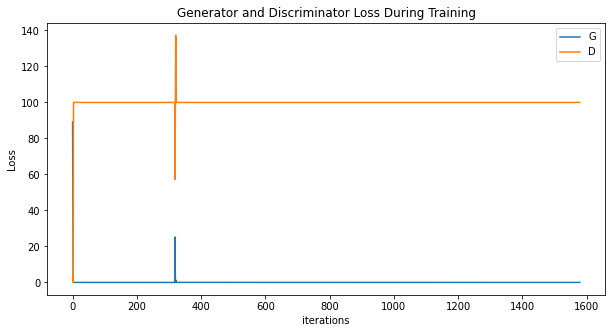

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

/home/ubuntu/final/data/output14


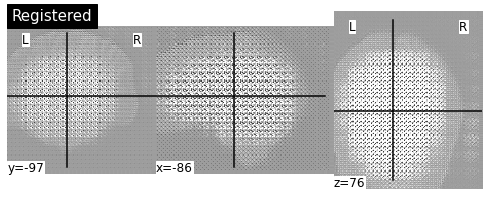

Image dimensions: (145, 174, 145)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (145, 174, 145)
affine:
[[-1.  0.  0. -0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 145 174 145   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : 

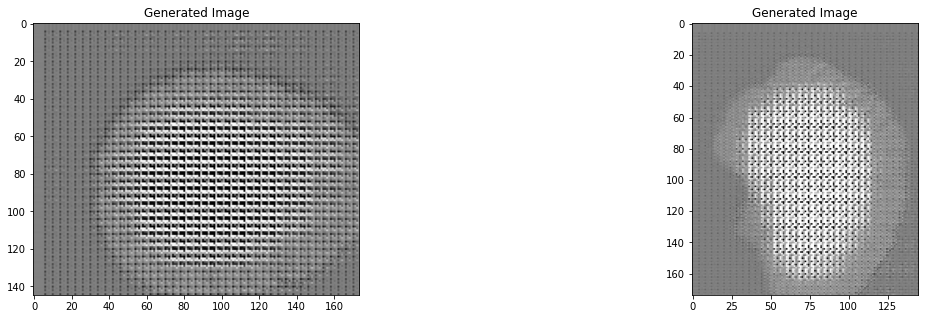

'\n# visualize output vs actual file\nplt.rcParams["figure.figsize"]=20,20\nplt.figure()\nplt.subplot(1,4,1)\nplt.imshow(image[:,:,100])\nplt.title(\'Generated Image\')\nplt.subplot(1,4,2)\nplt.title(\'Actual Image\')\nplt.subplot(1,4,3)\nplt.imshow(image[105,:,:])\nplt.title(\'Generated Image\')\nplt.subplot(1,4,4)\nplt.title(\'Actual Image\')\nplt.show()\n\n'

In [ ]:
import os
import torch
import numpy as np
import SimpleITK as sitk
from nilearn import plotting
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F
!pwd

os.chdir('../output14')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the models
generator = Generator().to(device)
discriminator = Discriminator().to(device)
t1_model = ConvNet().to(device)
t2_model = ConvNet().to(device)

# Load the trained weights
generator.load_state_dict(torch.load("generator.pt"))
discriminator.load_state_dict(torch.load("discriminator.pt"))
t1_model.load_state_dict(torch.load("t1_model.pt"))
t2_model.load_state_dict(torch.load("t2_model.pt"))

generator.eval()
discriminator.eval()
t1_model.eval()
t2_model.eval()

def normalize_image(image):
    # Convert image to floating-point format
    image = image.astype(np.float32)
    
    # Find minimum and maximum pixel values
    min_value = np.min(image)
    max_value = np.max(image)
    
    # Normalize pixel values
    normalized_image = (image - min_value) / (max_value - min_value)
    
    return normalized_image

def generate_img(t1w_path, t2w_path):
    # Load the images as SimpleITK images
    t1w_image_sitk = sitk.ReadImage(t1w_path)
    t2w_image_sitk = sitk.ReadImage(t2w_path)

    # Convert the images to numpy arrays
    t1w_image = sitk.GetArrayFromImage(t1w_image_sitk)
    t2w_image = sitk.GetArrayFromImage(t2w_image_sitk)

    # Convert the images to torch tensors and add a batch dimension
    t1w_image = t1w_image[3:179, 5:213, 3:179]
    t2w_image = t2w_image[3:179, 5:213, 3:179]
    t1w_image = np.stack([t1w_image])
    t1w_image = torch.from_numpy(t1w_image).unsqueeze(0).float().to(device)
    t2w_image = np.stack([t2w_image])
    t2w_image = torch.from_numpy(t2w_image).unsqueeze(0).float().to(device)

    t1x1, t1x2, t1x3, t1x4 = t1_model(t1w_image) 
    t2x1, t2x2, t2x3, t2x4 = t2_model(t2w_image)

    x4 = torch.cat((t1x4.detach(), t2x4.detach()), 1)
    x3 = t1x3.detach() + t2x3.detach()
    x2 = t1x2.detach() + t2x2.detach()
    x1 = t1x1.detach() + t2x1.detach()

    generated_image = generator(x1, x2, x3, x4)
    generated_image = F.pad(generated_image, pad=(3, 3, 5, 5, 3, 3), mode='replicate')
    
    # Create a SimpleITK image from the numpy array
    sitk_image = sitk.GetImageFromArray(generated_image)

    # Define the desired output size
    output_size = (145, 174, 145)

    # Calculate the new spacing
    original_size = sitk_image.GetSize()
    original_spacing = sitk_image.GetSpacing()
    new_spacing = [old_sz*old_spc/new_sz  for old_sz, old_spc, new_sz in zip(original_size, original_spacing, output_size)]

    # Resample the image
    resampler = sitk.ResampleImageFilter()
    resampler.SetSize(output_size)
    resampler.SetOutputSpacing(new_spacing)  # Use the new spacing here
    resampler.SetOutputOrigin(sitk_image.GetOrigin())
    resampler.SetOutputDirection(sitk_image.GetDirection())
    resampled_image = resampler.Execute(sitk_image)

    # Convert the resampled image back to a numpy array
    resampled_array = sitk.GetArrayFromImage(resampled_image)

    return resampled_array

# Call the function with the paths to your T1W and T2W images
synthesized_fa_image = generate_img('../output8/E11/normalized/T1w_1mm_normalized.nii.gz', '../output8/E11/registered/T2w_align.nii.gz')

# Save the synthesized image to a file
sitk.WriteImage(sitk.GetImageFromArray(synthesized_fa_image), 'synthesized_fa_image.nii.gz')

def display_image(input_image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        input_image_file (str): Path to the original NIfTI file.
        output_image_file (str): Path to the skull-stripped NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(input_image_file, title=title, display_mode='ortho')
    plotting.show()

display_image('synthesized_fa_image.nii.gz','Registered')

import nibabel as nib

# Load the NIfTI image
image_path = 'synthesized_fa_image.nii.gz'
image = nib.load(image_path)

# Get the image dimensions
image_shape = image.shape

print("Image dimensions:", image_shape)
print(image)


# Load the NIfTI image
image_path = 'synthesized_fa_image.nii.gz'
image = nib.load(image_path)

# Get the image data as a NumPy array
image_data = image.get_fdata()

# Visualize the image slices
plt.rcParams["figure.figsize"] = (20, 5)

plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, 100], cmap='gray')
plt.title('Generated Image')

plt.subplot(1, 2, 2)
plt.imshow(image_data[105, :, :], cmap='gray')
plt.title('Generated Image')

plt.show()


"""
# visualize output vs actual file
plt.rcParams["figure.figsize"]=20,20
plt.figure()
plt.subplot(1,4,1)
plt.imshow(image[:,:,100])
plt.title('Generated Image')
plt.subplot(1,4,2)
plt.title('Actual Image')
plt.subplot(1,4,3)
plt.imshow(image[105,:,:])
plt.title('Generated Image')
plt.subplot(1,4,4)
plt.title('Actual Image')
plt.show()

"""


/home/ubuntu/final/data/output14


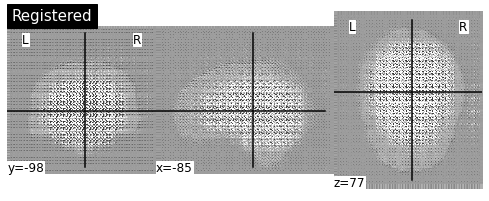

Image dimensions: (182, 218, 182)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (182, 218, 182)
affine:
[[-1.  0.  0. -0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 182 218 182   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : 

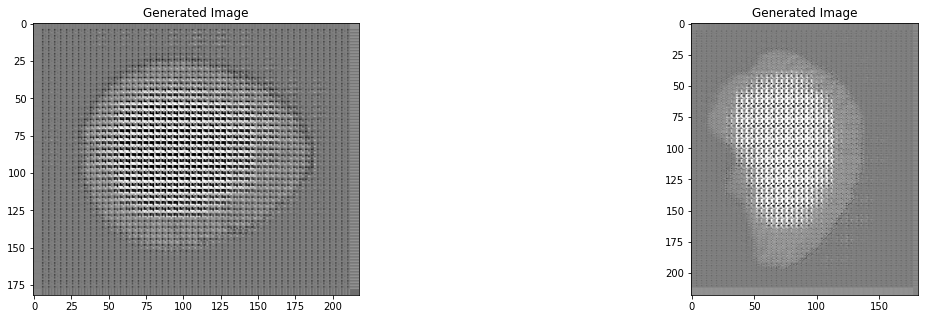

'\n# visualize output vs actual file\nplt.rcParams["figure.figsize"]=20,20\nplt.figure()\nplt.subplot(1,4,1)\nplt.imshow(image[:,:,100])\nplt.title(\'Generated Image\')\nplt.subplot(1,4,2)\nplt.title(\'Actual Image\')\nplt.subplot(1,4,3)\nplt.imshow(image[105,:,:])\nplt.title(\'Generated Image\')\nplt.subplot(1,4,4)\nplt.title(\'Actual Image\')\nplt.show()\n\n'

In [14]:
import os
import torch
import numpy as np
import SimpleITK as sitk
from nilearn import plotting
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F
!pwd

os.chdir('../output14')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the models
generator = Generator().to(device)
discriminator = Discriminator().to(device)
t1_model = ConvNet().to(device)
t2_model = ConvNet().to(device)

# Load the trained weights
generator.load_state_dict(torch.load("generator.pt"))
discriminator.load_state_dict(torch.load("discriminator.pt"))
t1_model.load_state_dict(torch.load("t1_model.pt"))
t2_model.load_state_dict(torch.load("t2_model.pt"))

generator.eval()
discriminator.eval()
t1_model.eval()
t2_model.eval()

def normalize_image(image):
    # Convert image to floating-point format
    image = image.astype(np.float32)
    
    # Find minimum and maximum pixel values
    min_value = np.min(image)
    max_value = np.max(image)
    
    # Normalize pixel values
    normalized_image = (image - min_value) / (max_value - min_value)
    
    return normalized_image

def generate_img(t1w_path, t2w_path):
    # Load the images as SimpleITK images
    t1w_image_sitk = sitk.ReadImage(t1w_path)
    t2w_image_sitk = sitk.ReadImage(t2w_path)

    # Convert the images to numpy arrays
    t1w_image = sitk.GetArrayFromImage(t1w_image_sitk)
    t2w_image = sitk.GetArrayFromImage(t2w_image_sitk)

    # Convert the images to torch tensors and add a batch dimension
    t1w_image = t1w_image[3:179, 5:213, 3:179]
    t2w_image = t2w_image[3:179, 5:213, 3:179]
    t1w_image = np.stack([t1w_image])
    t1w_image = torch.from_numpy(t1w_image).unsqueeze(0).float().to(device)
    t2w_image = np.stack([t2w_image])
    t2w_image = torch.from_numpy(t2w_image).unsqueeze(0).float().to(device)

    t1x1, t1x2, t1x3, t1x4 = t1_model(t1w_image) 
    t2x1, t2x2, t2x3, t2x4 = t2_model(t2w_image)

    x4 = torch.cat((t1x4.detach(), t2x4.detach()), 1)
    x3 = t1x3.detach() + t2x3.detach()
    x2 = t1x2.detach() + t2x2.detach()
    x1 = t1x1.detach() + t2x1.detach()

    generated_image = generator(x1, x2, x3, x4)
    generated_image = F.pad(generated_image, pad=(3, 3, 5, 5, 3, 3), mode='replicate')
    
    # Convert the tensor back to numpy
    generated_image = generated_image.squeeze().cpu().detach().numpy()
    """
    # Create a SimpleITK image from the numpy array
    sitk_image = sitk.GetImageFromArray(generated_image)
    
    # Define the desired output size
    output_size = (145, 174, 145)

    # Create a resample filter
    resampler = sitk.ResampleImageFilter()
    resampler.SetSize(output_size)
    resampler.SetOutputSpacing(synthesized_fa_image.GetSpacing())
    resampler.SetOutputOrigin(synthesized_fa_image.GetOrigin())
    resampler.SetOutputDirection(synthesized_fa_image.GetDirection())

    # Convert the resampled image back to a numpy array
    resampled_array = sitk.GetArrayFromImage(resampled_image)

    # Normalize the image
    normalized_array = normalize_image(resampled_array)
    """
    return generated_image

# Call the function with the paths to your T1W and T2W images
synthesized_fa_image = generate_img('../output8/E11/normalized/T1w_1mm_normalized.nii.gz', '../output8/E11/registered/T2w_align.nii.gz')

# Save the synthesized image to a file
sitk.WriteImage(sitk.GetImageFromArray(synthesized_fa_image), 'synthesized_fa_image.nii.gz')

def display_image(input_image_file, title):
    """
    Display NIfTI image using nilearn.
    
    Args:
        input_image_file (str): Path to the original NIfTI file.
        output_image_file (str): Path to the skull-stripped NIfTI file.
        title (str): Title of the plot.
    """
    plotting.plot_anat(input_image_file, title=title, display_mode='ortho')
    plotting.show()

display_image('synthesized_fa_image.nii.gz','Registered')

import nibabel as nib

# Load the NIfTI image
image_path = 'synthesized_fa_image.nii.gz'
image = nib.load(image_path)

# Get the image dimensions
image_shape = image.shape

print("Image dimensions:", image_shape)
print(image)


# Load the NIfTI image
image_path = 'synthesized_fa_image.nii.gz'
image = nib.load(image_path)

# Get the image data as a NumPy array
image_data = image.get_fdata()

# Visualize the image slices
plt.rcParams["figure.figsize"] = (20, 5)

plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, 100], cmap='gray')
plt.title('Generated Image')

plt.subplot(1, 2, 2)
plt.imshow(image_data[105, :, :], cmap='gray')
plt.title('Generated Image')

plt.show()


"""
# visualize output vs actual file
plt.rcParams["figure.figsize"]=20,20
plt.figure()
plt.subplot(1,4,1)
plt.imshow(image[:,:,100])
plt.title('Generated Image')
plt.subplot(1,4,2)
plt.title('Actual Image')
plt.subplot(1,4,3)
plt.imshow(image[105,:,:])
plt.title('Generated Image')
plt.subplot(1,4,4)
plt.title('Actual Image')
plt.show()

"""


In [15]:
# Change the working directory to the "data" folder
!pwd
os.chdir('../output8')

# Get the list of patient folders
patient_folders = [folder for folder in os.listdir() if os.path.isdir(folder)]

# Register images to T1w space using Diffeomorphic Demons
for patient_folder in patient_folders:
    output_folder = os.path.abspath(patient_folder)

    # Create the output folder for the registered images
    synthesized_output_folder = os.path.join(output_folder, "synthesized")
    os.makedirs(synthesized_output_folder, exist_ok=True)

    t1w_image_path = os.path.join(output_folder, "normalized", "T1w_1mm_normalized.nii.gz")
    t2w_image_path = os.path.join(output_folder, "registered", "T2w_align.nii.gz")
    #fa_image_path = os.path.join(output_folder, "registered", "FA_1.25mm_normalized.nii.gz")
    #adc_image_path = os.path.join(output_folder, "registered", "ADC_1.25mm_normalized.nii.gz")

    # synthesized_image_path = os.path.join(synthesized_output_folder, "ADC_synthesized.nii.gz")
    synthesized_image_path = os.path.join(synthesized_output_folder, "FA_synthesized.nii.gz")

    t1w_image_file = nib.load(t1w_image_path)
    t1w_image = t1w_image_file.get_fdata()
    t2w_image_file = nib.load(t2w_image_path)
    t2w_image = t2w_image_file.get_fdata()

    generated_image = generate_img(t1w_image, t2w_image)

    # visualize output vs actual file
    plt.rcParams["figure.figsize"]=20,20
    plt.figure()
    plt.subplot(1,4,1)
    plt.imshow(generated_image[:,:,100])
    plt.title('Generated Image')
    plt.subplot(1,4,2)
    plt.title('Actual Image')
    plt.subplot(1,4,3)
    plt.imshow(generated_image[105,:,:])
    plt.title('Generated Image')
    plt.subplot(1,4,4)
    plt.title('Actual Image')
    plt.show()

    sitk.WriteImage(generated_image, synthesized_image_path)

/home/ubuntu/final/data/output14


RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]" does not exist.